# Barchart To Analyse Mean Resale Price by Flat Type Using HDB Dataset

In [2]:
# import the necessary packages
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter # customize the axis labels


In [3]:
filename = "C:/Users/lokf2/Desktop/SPDS/IT8701/CA1 Assignment1/hdb_dataset/MedianResalePricesforRegisteredApplicationsbyTownandFlatType.csv"

data = np.genfromtxt(filename, 
                     skip_header=1, 
                     dtype=[('quarter', 'U50'), ('town', 'U50'), ('flat_type', 'U50'), ('price', 'i8')], 
                     delimiter=',',
                     missing_values=['na', '-', 'NA'], filling_values=0)
print(data[:10])
print(data.dtype)
print(data.shape)

[('2007-Q2', 'Ang Mo Kio', '1-room',      0)
 ('2007-Q2', 'Ang Mo Kio', '2-room',      0)
 ('2007-Q2', 'Ang Mo Kio', '3-room', 172000)
 ('2007-Q2', 'Ang Mo Kio', '4-room', 260000)
 ('2007-Q2', 'Ang Mo Kio', '5-room', 372000)
 ('2007-Q2', 'Ang Mo Kio', 'Executive',      0)
 ('2007-Q2', 'Bedok', '1-room',      0)
 ('2007-Q2', 'Bedok', '2-room',      0)
 ('2007-Q2', 'Bedok', '3-room', 172000)
 ('2007-Q2', 'Bedok', '4-room', 224500)]
[('quarter', '<U50'), ('town', '<U50'), ('flat_type', '<U50'), ('price', '<i8')]
(10608,)


In [4]:
# Create a mask to filter out rows where 'NumberOfSitups' is 0
valid_rows = data['price'] != 0

# Apply the mask to filter out the rows
data1 = data[valid_rows]

print(data1[:10])
print(data1.dtype)
print(data1.shape)

[('2007-Q2', 'Ang Mo Kio', '3-room', 172000)
 ('2007-Q2', 'Ang Mo Kio', '4-room', 260000)
 ('2007-Q2', 'Ang Mo Kio', '5-room', 372000)
 ('2007-Q2', 'Bedok', '3-room', 172000)
 ('2007-Q2', 'Bedok', '4-room', 224500)
 ('2007-Q2', 'Bedok', '5-room', 332000)
 ('2007-Q2', 'Bedok', 'Executive', 420000)
 ('2007-Q2', 'Bishan', '3-room', 205000)
 ('2007-Q2', 'Bishan', '4-room', 311500)
 ('2007-Q2', 'Bishan', '5-room', 400000)]
[('quarter', '<U50'), ('town', '<U50'), ('flat_type', '<U50'), ('price', '<i8')]
(4883,)


In [5]:
#Extract and Sort Labels
labels = list(set(data1['flat_type']))
labels.sort()
print("labels: ", labels)
print()

#Create Levels Array
levels = np.arange(0,len(labels))
print("levels:", levels)
print()

#Extract Flat Type and Price Columns
levels_values = data1[['flat_type','price']]
print("levels_values: ", levels_values)
print()

#Extract Price Values
values = levels_values['price']
print("values: ", values)

labels:  ['2-room', '3-room', '4-room', '5-room', 'Executive']

levels: [0 1 2 3 4]

levels_values:  [('3-room', 172000) ('4-room', 260000) ('5-room', 372000) ...
 ('4-room', 535000) ('5-room', 650000) ('Executive', 825000)]

values:  [172000 260000 372000 ... 535000 650000 825000]


In [6]:
# Calculate and print average values
avg_values = {}

for i in labels:
    valuesforlevel = levels_values['price'][levels_values['flat_type'] == i]
    avg = np.average(valuesforlevel)
    print("Average for level " + i + " is {:.0f}".format(avg))
    avg_values[i] = avg

Average for level 2-room is 309828
Average for level 3-room is 314900
Average for level 4-room is 457479
Average for level 5-room is 544754
Average for level Executive is 587504


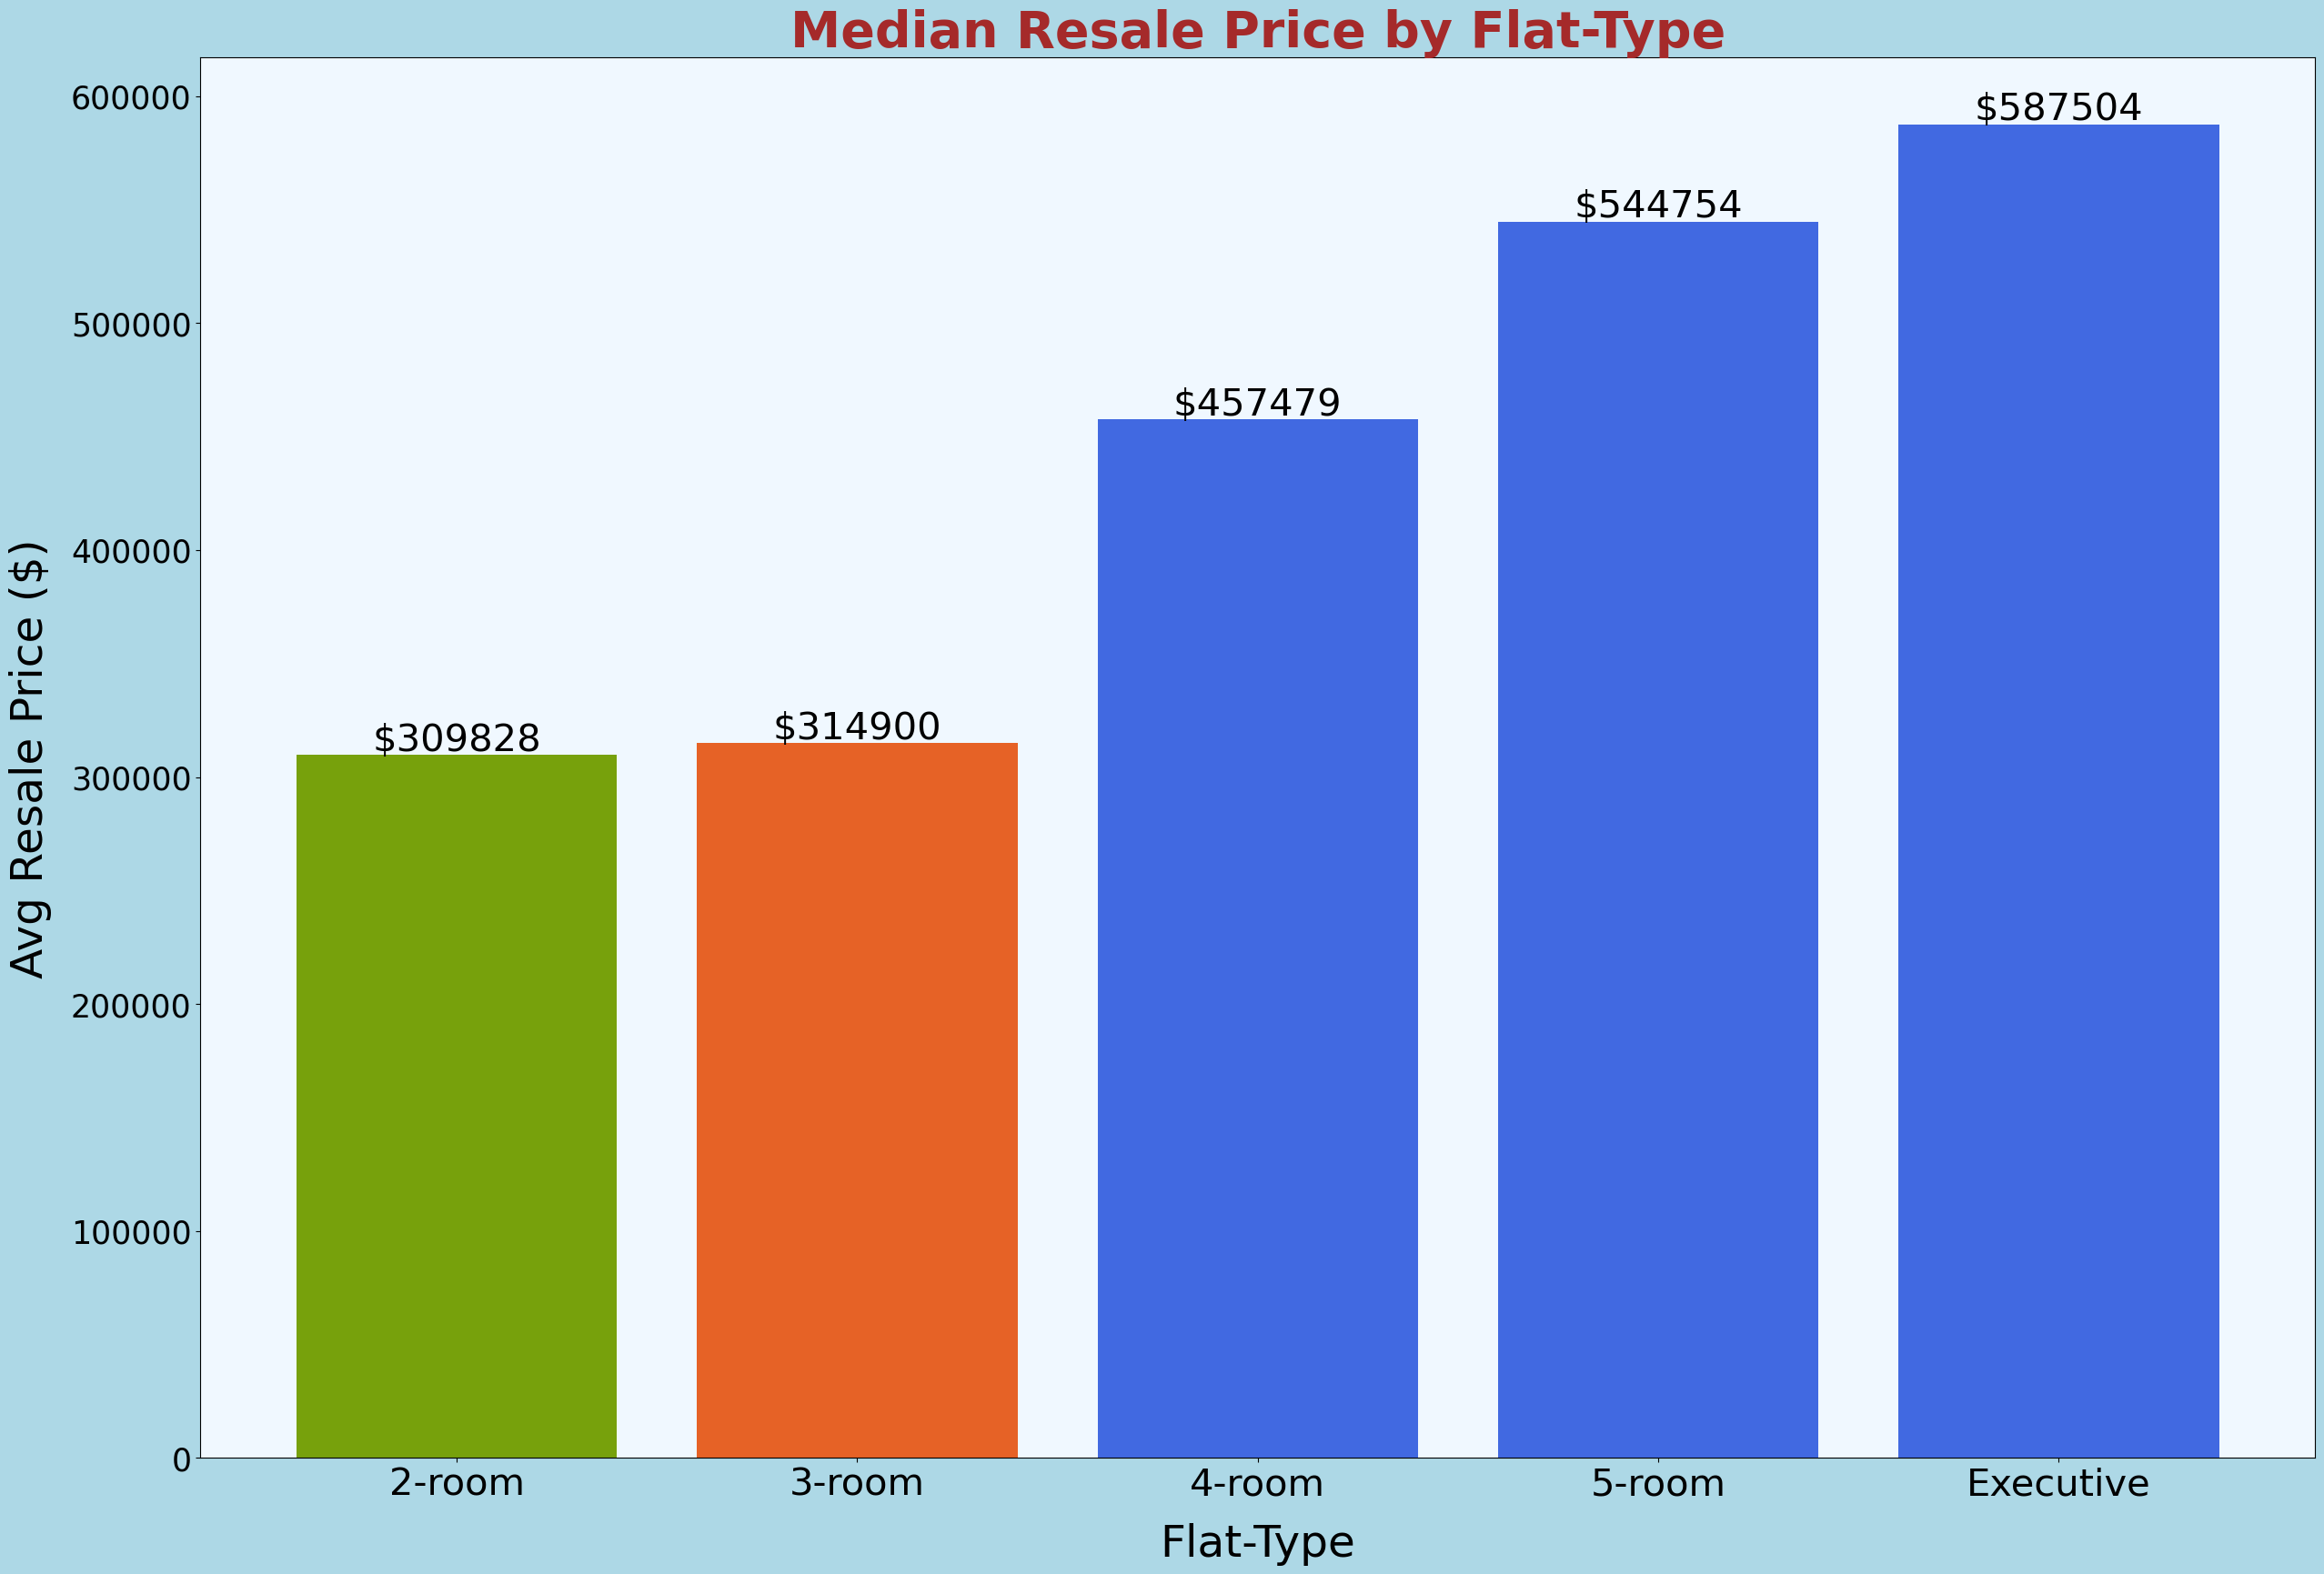

In [7]:
# create barchart
colors = ['#77A10C','#E66226','#4169e1','#4169e1', '#4169e1'] # List of colors

fig, ax = plt.subplots(figsize=(30, 20))
barchart = ax.bar(list(avg_values.keys()), list(avg_values.values()), color=colors)

# add price label to each bar
for i in range(len(barchart)):
    bar = barchart[i]
    x,y  = bar.get_xy()
    h = bar.get_height() + 2000
    plt.text(x + bar.get_width() / 2, h, "${:.0f}".format(list(avg_values.values())[i]), 
             horizontalalignment='center', fontsize=30)

# Set title and axis labels for the chart    
ax.set_title("Median Resale Price by Flat-Type", fontsize=40, fontweight='bold', color='brown')
ax.set_xlabel("Flat-Type", fontsize=35, labelpad=15)  # label padding: keep the desirable distance between labels and axes
ax.set_ylabel("Avg Resale Price ($)", fontsize=35, labelpad=15)
ax.set_yticks(np.arange(0, 700000, 100000))  # Example tick positions
ax.set_xticks(levels)
ax.set_xticklabels(labels, fontsize=30)
ax.tick_params(axis='y', labelsize=25) 

# Set background color for the axes and figure
ax.set_facecolor('#f0f8ff')  # AliceBlue background for the plot area
fig.patch.set_facecolor('#add8e6')  # LightBlue background for the figure

# Save the plot to a file
plt.savefig('Barchart - Median Resale Price By Flat-Type.png', dpi=300, bbox_inches='tight')

plt.show()